# Segmentation - nails, its position and length

We have a simple production line (check image bellow), which produces *nails* and we want to design automatic control algorithm for checking position and length of nail. We haven't choose camera for the following project yet, but we are sure that following parameters will be provided later:

1. L - distance of object (plane) from camera
1. resolution
1. angle of view

![Production line and camera](data/production_line.svg)

Our task is to design algorithm, which takes image from camera, performs some calculation and returns following information about image:

1. is there a nail? (boolean, True or False)
1. approximate start of a nail (tuple of floats)
1. approximate end of a nail (tuple of floats)
1. approximate length of a nail (float)

Both start and end coordinates (points 2 and 3) are measured from **left upper** corner of image. Of course, if there is no nail in the image points 2,3 and 4 can return for example None or 0 or some other nonsense value.

Of course, it is homework, so we live in a nearly perfect world. So some additional notes:

1. Images are ideal, there are images with only one nail, or none nail
1. Background is white and with little noise

In [75]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [76]:
PATH = os.path.join("data", "homework")
"""
str,
folder, where are all images for homework
"""
LENGTH = 0.8
"""
float,
length (letter 'L' in diagram above), this number represents
length between plane and camera lens.
"""
RESOLUTION = (600, 397)
"""
tuple of int,
resolution of camera('w x h' in diagram above)
"""
ALPHA = 15
"""
int,
angle of camera (letter alpha in diagram above)
"""

'\nint,\nangle of camera (letter alpha in diagram above)\n'

In [77]:

def detect_nail(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, binary_image = cv2.threshold(gray_image,  0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

    if (len(contours) > 1) and (cv2.contourArea(sorted_contours[1]) > 3000):
        contour = sorted_contours[1]

        rotated_rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rotated_rect)
        box = box.astype(int)

        center, size, angle = rotated_rect
        width, height = size

        if width > height:
            start_point = ((box[0][0] + box[1][0]) // 2, (box[0][1] + box[1][1]) // 2)
            end_point = ((box[2][0] + box[3][0]) // 2, (box[2][1] + box[3][1]) // 2)
        else:
            start_point = ((box[1][0] + box[2][0]) // 2, (box[1][1] + box[2][1]) // 2)
            end_point = ((box[3][0] + box[0][0]) // 2, (box[3][1] + box[0][1]) // 2)

        nail_length = cv2.norm(np.array(start_point), np.array(end_point))
        is_nail_present = True

        image_with_rect = image.copy()
        cv2.drawContours(image_with_rect, [box], 0, (0, 255, 0), 2)

        cv2.drawMarker(image_with_rect, start_point, (0, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)
        cv2.drawMarker(image_with_rect, end_point, (255, 0, 0), markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)

        plt.imshow(cv2.cvtColor(image_with_rect, cv2.COLOR_BGR2RGB))
        plt.title('Nail with pixel length of {}'.format(nail_length))
        plt.show()
    else:
        is_nail_present = False
        start_point = end_point = ()
        nail_length = 0.0

    return is_nail_present, start_point, end_point, nail_length

In [78]:
def get_real_length(nail_pixel_length, L, resolution, angle_of_view):
    w, _ = resolution
    angle_of_view_rad = math.radians(angle_of_view)
    focal_length_estimate = (w / 2) / math.tan(angle_of_view_rad / 2)
    real_length = (nail_pixel_length * L) / focal_length_estimate

    return real_length

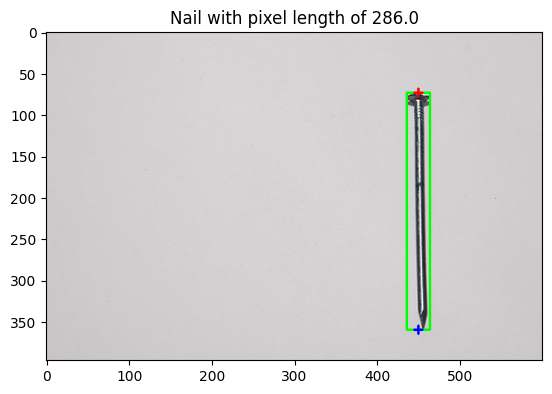

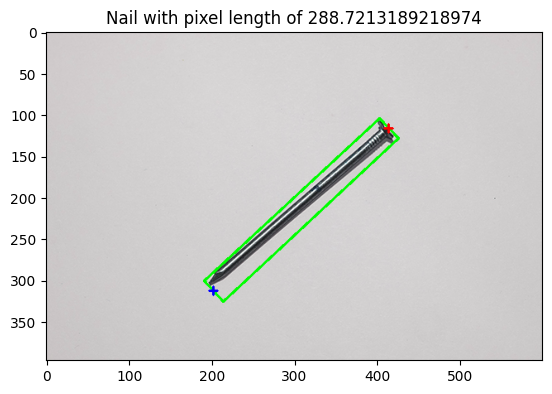

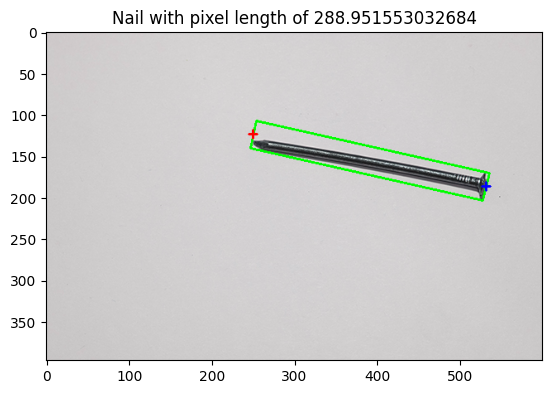

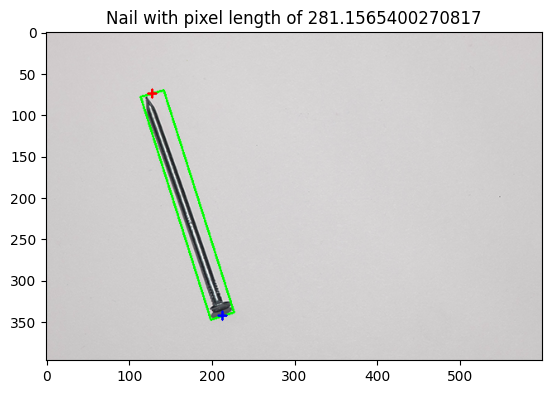

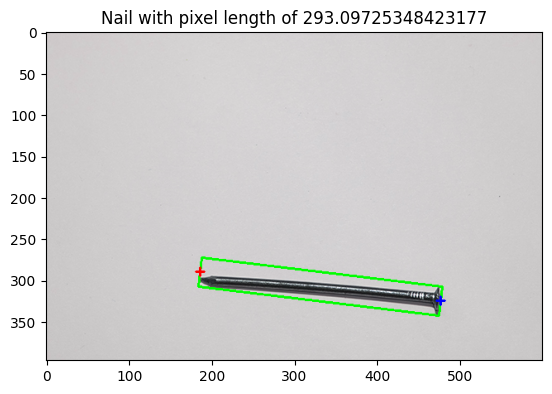

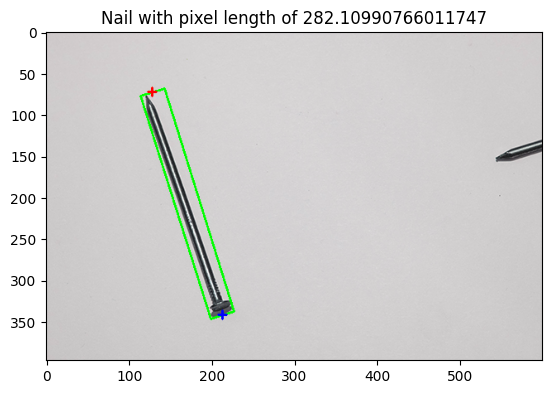

(False, (), (), 0.0)

In [79]:
for i in range(1,6):
    im = cv2.imread(os.path.join(PATH, "nail_0{}.jpg".format(i)))
    im_color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    detect_nail(im_color)

img = cv2.imread(os.path.join(PATH, "nail_error.jpg"))
im_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detect_nail(im_color)

img = cv2.imread(os.path.join(PATH, "nail_empty.jpg"))
im_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detect_nail(im_color)

# Real size

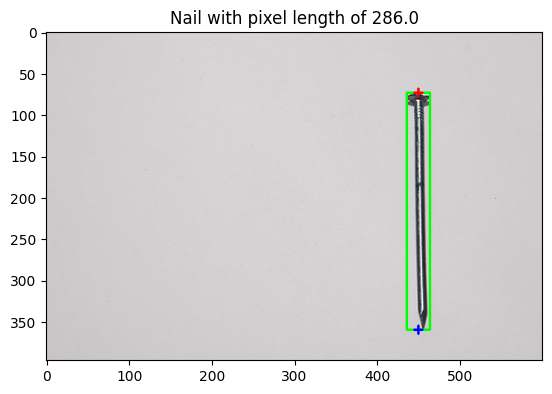

'Real life length is: 0.10040697149332056'

In [83]:
img = cv2.imread(os.path.join(PATH, "nail_01.jpg"))
im_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, _, _, length = detect_nail(im_color)

f"Real life length is: {get_real_length(length, LENGTH, RESOLUTION, ALPHA)}"

In [84]:
empty = cv2.imread(os.path.join(PATH, "nail_empty.jpg"))
empty_color = cv2.cvtColor(empty, cv2.COLOR_BGR2RGB)

error = cv2.imread(os.path.join(PATH, "nail_error.jpg"))
error_color = cv2.cvtColor(error, cv2.COLOR_BGR2RGB)

nails = []
for i in range(1,6):
    im = cv2.imread(os.path.join(PATH, "nail_0{}.jpg".format(i)))
    im_color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im_gray = cv2.cvtColor(im_color, cv2.COLOR_RGB2GRAY)
    nails.append(im_color)

nails.append(empty_color)
nails.append(error_color)

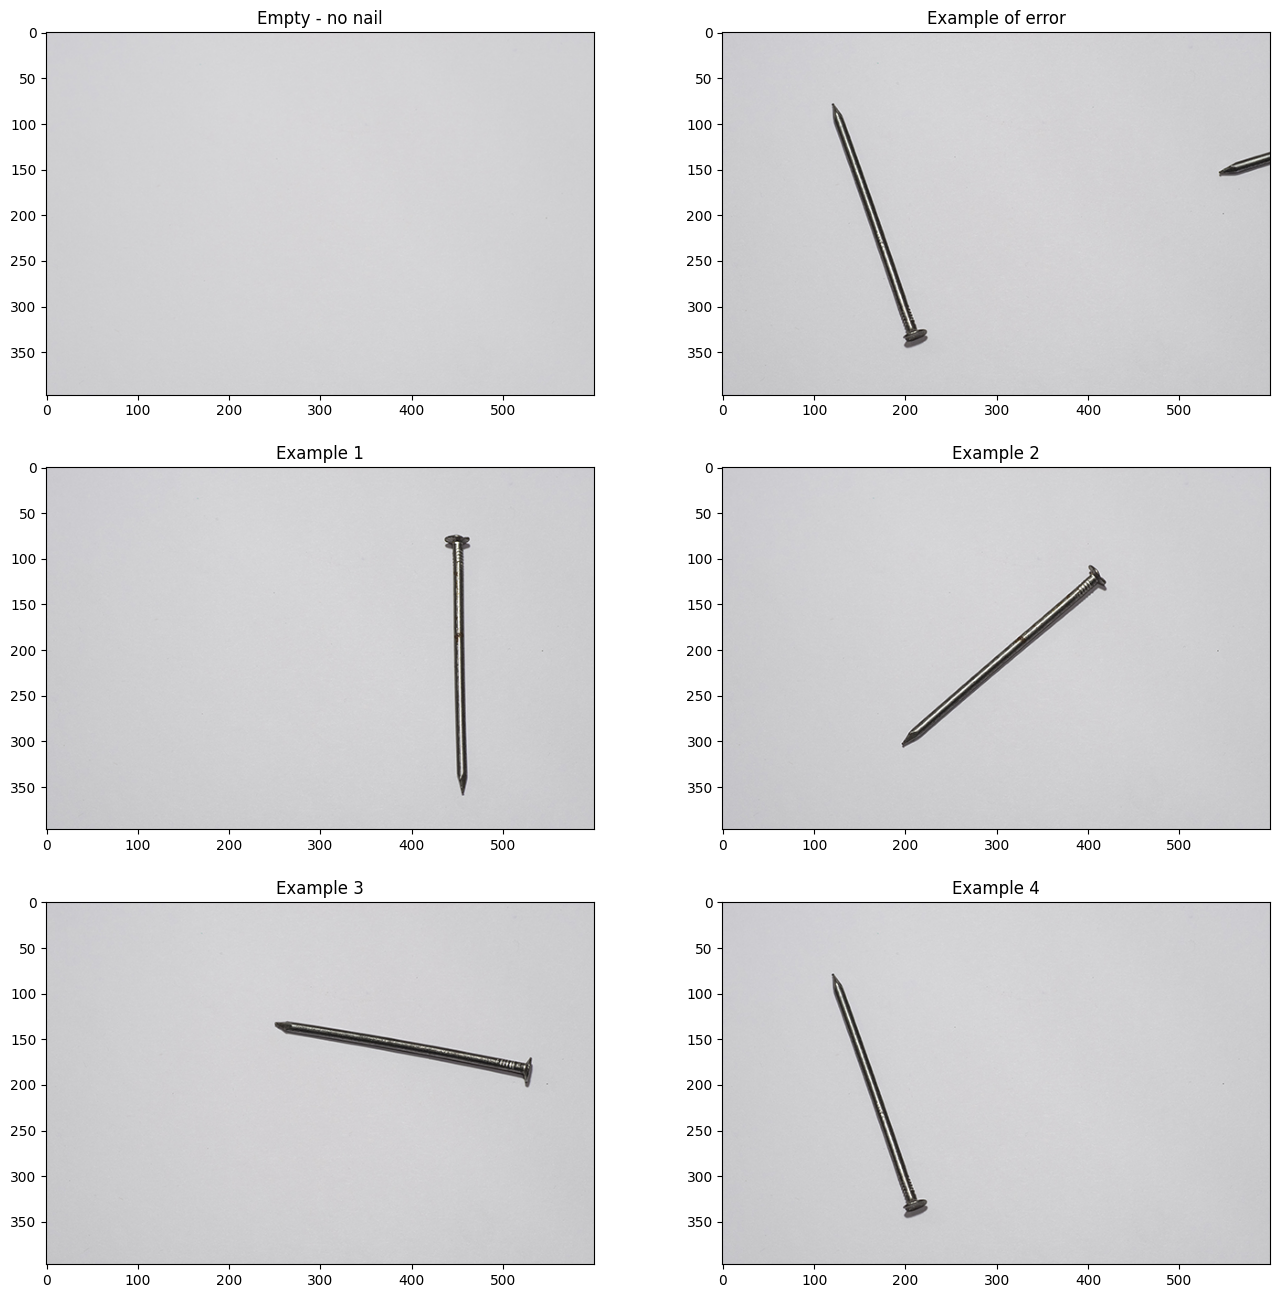

In [85]:
plt.figure(figsize=(16,16))

ax = plt.subplot(321)
ax.set_title("Empty - no nail")
plt.imshow(empty_color)

ax = plt.subplot(322)
ax.set_title("Example of error")
plt.imshow(error_color)

ax = plt.subplot(323)
ax.set_title("Example 1")
plt.imshow(nails[0])

ax = plt.subplot(324)
ax.set_title("Example 2")
plt.imshow(nails[1])

ax = plt.subplot(325)
ax.set_title("Example 3")
plt.imshow(nails[2])

ax = plt.subplot(326)
ax.set_title("Example 4")
plt.imshow(nails[3])